In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [2]:
data = Table.read('data_PAH1_removed.fits')
print(data.colnames)
print (len(data))

['null_bitfield_flags', 'designation', 'tmass_designation', 'l', 'b', 'ra', 'dec', 'mag_j', 'dj_m', 'mag_h', 'dh_m', 'mag_ks', 'dks_m', 'mag3_6', 'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8', 'd5_8m', 'mag8_0', 'd8_0m']
49256902


In [3]:
band4_5 = data['mag4_5']
band5_8 = data['mag5_8']
band3_6 = data['mag3_6']
band8_0 = data['mag8_0']

In [4]:
c = band5_8-band8_0
d = band4_5-band5_8
PAH_index_2 = []
for i in range(0,len(data)):
    if d[i] < 1.05:
        if c[i]>1:
            if d[i]<(1.05/1.2)*(c[i]-1):
                if band4_5[i] > 11.5:
                    if data['d3_6m'][i]<0.2:
                        if data['d4_5m'][i]<0.2:
                            if data['d5_8m'][i]<0.2:
                                if data['d8_0m'][i]<0.2:
                                    PAH_index_2.append(i)

In [5]:
PAH2 = data[PAH_index_2]
PAH2.write('PAH_2.fits')

In [6]:
len(PAH2)

629

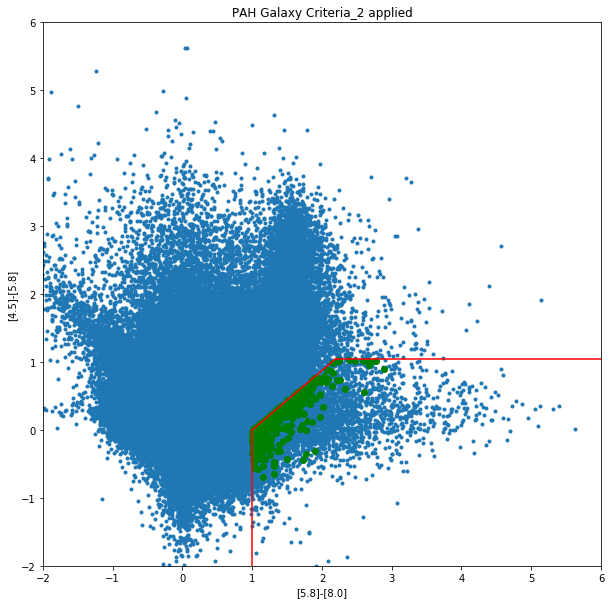

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(c,d,marker = '.')
plt.scatter(c[PAH_index_2],d[PAH_index_2], color = 'g')
plt.plot([2.2, 6], [1.05, 1.05], 'k-', color = 'r') #[4.5] − [5.8] < 1.05
plt.plot([1,1],[-3,0] , color = 'r') #[5.8] − [8.0] > 1
###[4.5] − [5.8] <(1.05/1.2) × ([5.8] − [8.0] − 1)###
def fit(t):
    return (1.05/1.2)*(t-1)
x = np.arange(1,2.2,0.1)
plt.plot(x,fit(x),color = 'r')
###
plt.xlim(-2, 6)
plt.ylim(-2, 6)
plt.xlabel('[5.8]-[8.0]')
plt.ylabel('[4.5]-[5.8]')
plt.title('PAH Galaxy Criteria_2 applied')

data.remove_rows(PAH_index_2)
data.write('data_PAH1&2_removed.fits')
